In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm


In [ ]:

# Aufgabe 5.1
# Two sample t test of El Nino June temperatures
# a: Signific diff?
# Null hypothesis: No difference @ 95% confidence level: Type I error alpha 5%
# b: Construct a 95% confidence interval for the differences


In [3]:
# A3 Tempeartures June Climate Data for Guayquil, Ecuardor, 1951-1970

temp_elnino = np.array([26.1,24.8,26.4,26.6,26.8]) # El Nino years
temp_lanina = np.array([24.5,24.8,24.5,24.1,24.3,24.9,23.7,23.5,24.0,24.1,23.7,24.3,24.6,24.8,24.4,25.2]) # Canandaigua T max

print(temp_elnino.shape)
print(temp_lanina.shape)


(5,)
(16,)


El Nino:  26.140000000000004 0.708801805866774
La Nina:  24.3375 0.4580870550452173


(array([1., 2., 1., 2., 2., 3., 1., 2., 1., 1.]),
 array([23.5 , 23.67, 23.84, 24.01, 24.18, 24.35, 24.52, 24.69, 24.86,
        25.03, 25.2 ]),
 <BarContainer object of 10 artists>)

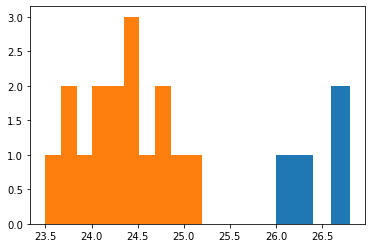

In [6]:
mean_elnino = np.mean(temp_elnino)
std_elnino = np.std(temp_elnino)

mean_lanina = np.mean(temp_lanina)
std_lanina = np.std(temp_lanina)


print('El Nino: ',mean_elnino,std_elnino)
print('La Nina: ',mean_lanina,std_lanina)

plt.hist(temp_elnino)
plt.hist(temp_lanina)

In [13]:
z = (mean_elnino-mean_lanina)/(np.sqrt(std_elnino**2/5+std_lanina**2/16))

print('Z-level: ',z)
print('Equal varaince?:', (std_elnino/std_lanina)**2*16/5)
stats.ttest_ind(a=temp_elnino, b=temp_lanina, equal_var=False)


#x = np.linspace(0, 40)
#y = norm.pdf(x, mean_x_cond_y, std_x_cond_y)
#plt.plot(x,y)

Z-level:  5.348047026170546
Equal varaince?: 7.661319434102756


Ttest_indResult(statistic=4.8244606437984014, pvalue=0.00497581525258076)

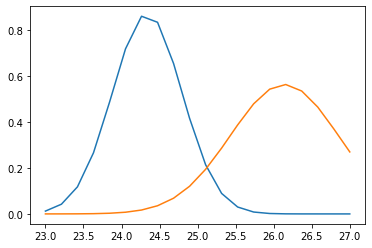

In [15]:
x = np.linspace(23, 27, 20)
y = norm.pdf(x, mean_lanina, std_lanina)
y1 = norm.pdf(x, mean_elnino, std_elnino)


In [53]:
x_conf_onesided = np.sqrt(np.var(temp_lanina))*1.729+mean_lanina
x_conf_two1 = np.sqrt(np.var(temp_lanina))*2.093+mean_lanina
x_conf_two2 = -np.sqrt(np.var(temp_lanina))*2.093+mean_lanina

print('95% confidence level for one sided: ',x_conf_onesided)
print('95% confidence intervall for two sided: ',x_conf_two1,x_conf_two2)


95% confidence level for one sided:  25.12953251817318
95% confidence intervall for two sided:  25.296276206209637 23.37872379379036


Text(23.27872379379036, 0.0, 'Two sided 95% conf. interval: 23.4 °C')

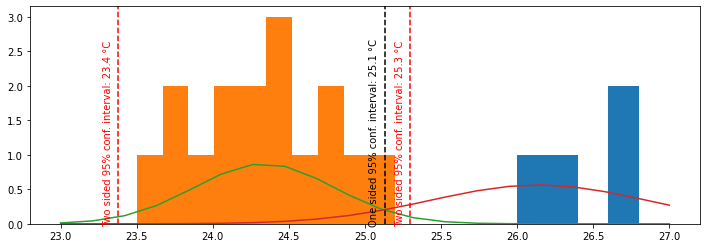

In [57]:
fig, ax = plt.subplots(figsize=(12,4))
#xs = np.linspace(23,25,100)
#dof=16
#plt.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF La Nina")
#xs = np.linspace(25,27,100)
#dof=5
#plt.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF El Nino")
plt.hist(temp_elnino)
plt.hist(temp_lanina)
plt.plot(x,y)
plt.plot(x,y1)
plt.axvline(x_conf_onesided,color='k',linestyle='--')
plt.axvline(x_conf_two1,color='r',linestyle='--')
plt.axvline(x_conf_two2,color='r',linestyle='--')
ax.text(x_conf_onesided-.1,0.0,'One sided 95% conf. interval: '+f"{x_conf_onesided:.3}"+' °C',rotation=90)
ax.text(x_conf_two1-.1,0.0,'Two sided 95% conf. interval: '+f"{x_conf_two1:.3}"+' °C',rotation=90,color='r')
ax.text(x_conf_two2-.1,0.0,'Two sided 95% conf. interval: '+f"{x_conf_two2:.3}"+' °C',rotation=90,color='r')

In [47]:
dx_conf_onesided = np.sqrt(np.var(temp_lanina))*1.729+abs(mean_lanina-mean_elnino)
dx_conf_two1 = np.sqrt(np.var(temp_lanina))*2.093+abs(mean_lanina-mean_elnino)
dx_conf_two2 = -np.sqrt(np.var(temp_lanina))*2.093+abs(mean_lanina-mean_elnino)

In [48]:
print('95% confidence level of differences for one sided: ',dx_conf_onesided)
print('95% confidence intervall of differences for two sided: ',dx_conf_two1,dx_conf_two2)

95% confidence level of differences for one sided:  2.594532518173186
95% confidence intervall of differences for two sided:  2.7553210744940575 0.8496789255059536


In [49]:
#https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))


t = 3.814830513536093
p = 0.0012687578594969828
t = 3.814830513536093
p = 0.0012687578594969


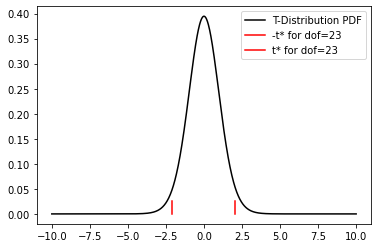

In [58]:
#https://stackoverflow.com/questions/42331555/having-trouble-visualizing-a-t-distribution-in-python
## Basic T-Distribution
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

## Setup      
dof = 23        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t-score
tcrit = abs(st.t.ppf(alpha/ntails, dof))
# +=2.068

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
critline = np.linspace(0,alpha/ntails)  # y range for critical line, AKA probability from 0-p*
xs_1 = len(critline) * [-tcrit]         # X ranges for plotting
xs_2 = len(critline) * [tcrit]
plt.plot(xs_1, critline, 'r', label="-t* for dof=23")
plt.plot(xs_2, critline,'r', label="t* for dof=23")
plt.legend()